Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени

In [6]:
import numpy as np
x=np.array([6,8,3,3])
y=np.array([1,0.4,0.3,2.5])
A=np.vstack([x,np.ones(len(x))]).T
A
m,c=np.linalg.lstsq(A,y,rcond=None)[0]
print(m,c)
import matplotlib.pyplot as plt
plt.plot(x,y,'o',label='Исходные данные',markersize=10)
plt.plot(x,m*x+c,'r',label='Линейная экстраполяция')
plt.legend()
plt.show()


-0.18888888888888894 1.9944444444444442


In [11]:
from numpy import *
from numpy.random import *
delta =1.0
x=linspace(-3,7,9)
y=x**2+delta*(rand(9)-0.5)
x+=delta*(rand(9)-.5)
x.tofile('x_data.txt','\n')
y.tofile('y_data.txt','\n')
x=fromfile('x_data.txt', float,sep='\n')
y=fromfile('y_data.txt',float,sep='\n')
print(x)
print(y)
m=vstack((x**2,x,ones(9))).T
s= np.linalg.lstsq(m,y,rcond=None)[0]
x_prec=linspace(-5,5,101)
plt.plot(x,y,'D')
plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)
plt.grid()
plt.savefig('парабола.png')


[-2.61666682 -1.9066903  -0.98500386  0.96507456  2.42726578  3.27454571
  4.8849592   6.01921169  6.77087804]
[ 8.5011424   3.50535387  0.47971152  0.69621463  3.60053361 10.32845236
 20.73106038 33.09283572 48.8113357 ]


In [13]:
from numpy import *
from numpy.random import *
delta =1.0
x=linspace(-3,7,9)
y=x**2+delta*(rand(9)-0.5)
x+=delta*(rand(9)-.5)
x.tofile('x_data.txt','\n')
y.tofile('y_data.txt','\n')
x=fromfile('x_data.txt', float,sep='\n')
y=fromfile('y_data.txt',float,sep='\n')
print(x)
print(y)
m=vstack((x**3,x**2,x,ones(9))).T
s= np.linalg.lstsq(m,y,rcond=None)[0]
x_prec=linspace(-3,5,60)
plt.plot(x,y,'D')
plt.plot(x_prec,s[0]*x_prec**3+s[1]*x_prec**2+s[2]*x_prec+s[3],'-',lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

[-3.16758478 -1.89031543 -0.91003789  0.40150697  2.06766427  3.06537405
  4.03039289  6.04753721  7.04444605]
[ 8.61746012  3.04829238 -0.24706998  0.86407663  4.15122642 10.94928195
 20.69605197 33.43918947 48.69072824]


Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.


[ 0.24892038 -0.75488584]
0.00014234980312924508
0.12516965071210306


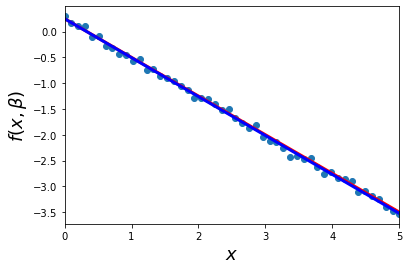

In [42]:
beta=(0.25,-0.75)
def f(x,b0,b1):
    return b0+b1*x
import numpy as np
xdata=np.linspace(0,5,50)
y=f(xdata,*beta)
ydata=y+0.05*np.random.randn(len(xdata))
from scipy.optimize import curve_fit
beta_opt,beta_cov= curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev=sum(beta_cov[0])
print(lin_dev)
residuals=ydata-f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=3)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=3)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize=18)
plt.show()

Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

In [60]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
my_dict={'Опыт работы':[1,2,3,4,5,6,7,8,9,10],
        'Заработная плата':[10,20,30,40,50,60,70,80,90,100]}
dataset=pd.DataFrame(my_dict)
dataset.head()



Опыт работы  Заработная плата
0            1                10
1            2                20
2            3                30
3            4                40
4            5                50

In [66]:
print(dataset.shape)
dataset.describe()



(10, 2)


Опыт работы  Заработная плата
count     10.00000         10.000000
mean       5.50000         55.000000
std        3.02765         30.276504
min        1.00000         10.000000
25%        3.25000         32.500000
50%        5.50000         55.000000
75%        7.75000         77.500000
max       10.00000        100.000000

In [82]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
my_dict={'Опыт работы':[1,2,3,4,5,6,7,8,9,10],
        'Заработная плата':[10,15,30,40,50,60,70,80,90,100]}
dataset=pd.DataFrame(my_dict)
dataset.head()
print(dataset.shape)
dataset.describe()
plt.scatter(dataset['Опыт работы'],dataset['Заработная плата'])
plt.xlabel("Опыт работы")
plt.ylabel("Заработная плата")
plt.show()
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,:1].values
print(X)
print(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)


(10, 2)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[-8.8817842e-16]
[[1.]]


In [83]:
y_pred=regressor.predict(X_test)
df={'Actual': [y_test],
    'Predicted': [y_pred]}
dataset=pd.DataFrame(df)
dataset


Actual       Predicted
0  [[3], [9]]  [[3.0], [9.0]]

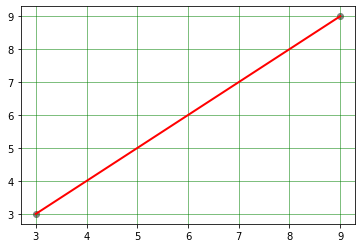

In [69]:
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
#plt.show()
plt.scatter(X_test,y_test,color='grey')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show()

Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1.
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pe
trol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

In [15]:
import numpy as np
y=[1,2,3,4,5,6,7,8,2,5]
X=[[0,3,5,6,7,8,3,1,4,6],
  [4,2,6,2,4,5,3,6,7,2],
  [2,5,1,6,8,3,1,4,6,8]]
X=np.transpose(X)
X=np.c_[X,np.ones(X.shape[0])]
linreg=np.linalg.lstsq(X,y,rcond=None)[0]
print(linreg)

[ 0.21441658  0.0175359  -0.10439908  3.76546747]


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstancce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
y=[1,2,3,4,5,6,7,8,2,5]
X=[[0,3,5,6,7,8,3,1,4,6],
  [4,2,6,2,4,5,3,6,7,2],
  [2,5,1,6,8,3,1,4,6,8]]
new_y=np.array(y)
new_y=new_y.transpose()
df1=pd.DataFrame(new_y)
new_X=np.array(X)
new_X=new_X.transpose()
df2=pd.DataFrame(new_X)
df1=df1.rename(columns={0:'y'},inplace=False)
df2=df2.rename(columns={0:'x1',1:'x2',2:'x3'},inplace=False)
frames=[df1,df2]
dataset=pd.concat([df1,df2],axis=1,join="inner")
dataset.head()


y  x1  x2  x3
0  1   0   4   2
1  2   3   2   5
2  3   5   6   1
3  4   6   2   6
4  5   7   4   8

In [17]:
print(dataset.shape)
dataset.describe()

(10, 4)


y        x1         x2         x3
count  10.000000  10.00000  10.000000  10.000000
mean    4.300000   4.30000   4.100000   4.400000
std     2.311805   2.58414   1.852926   2.633122
min     1.000000   0.00000   2.000000   1.000000
25%     2.250000   3.00000   2.250000   2.250000
50%     4.500000   4.50000   4.000000   4.500000
75%     5.750000   6.00000   5.750000   6.000000
max     8.000000   8.00000   7.000000   8.000000

In [18]:
X=dataset[['x1','x2','x3']]
y=dataset['y']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
regressor=LinearRegression()
regressor.fit(X_train,y_train)
coeff_df=pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df


Coefficient
x1     0.293422
x2     0.817639
x3    -0.071401

In [19]:
y_pred=regressor.predict(X_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df


Actual  Predicted
2       3   7.272992
8       2   7.440205

In [20]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))


Mean Squared Error: 23.927145185149804
